In [2]:
import sys
sys.path.append('../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import gym
from src.utils import EnvWrapper
from src.experience_replay import ExperienceReplay

In [4]:
env = EnvWrapper(gym.make('CarRacing-v0'), 4, 1)

In [5]:
obs = env.reset()

In [6]:
obs.shape

(4, 84, 84)

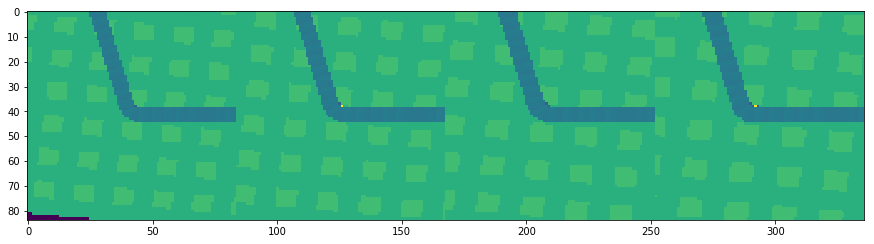

In [11]:
plt.figure(figsize=(15, 15))
# plt.rcParams.keys['figure.figsize'] = (15, 15)
plt.imshow(obs.reshape(84 * 4, 84).T)  # lol ok
plt.show()

In [12]:
action = env.action_space.sample()
for _ in range(20):
    obs, reward, done, _ = env.step(action)

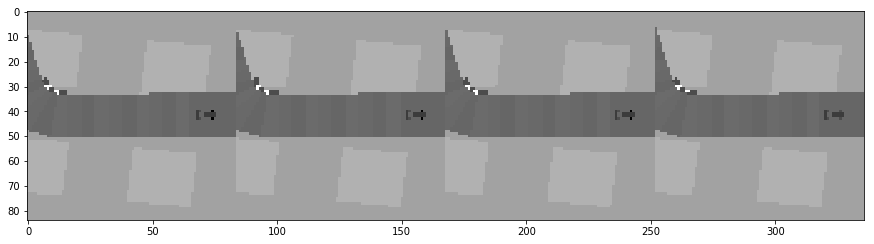

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(obs.reshape(84 * 4, 84).T, cmap='gray')  # lol ok
plt.show()

In [8]:
replay_buffer = ExperienceReplay(
    1_000, 
    env.observation_space.shape, 
    env.action_space.shape
)

In [11]:
replay_buffer.push(obs, action, reward, done)
replay_buffer.push(obs, action, reward, done)

In [12]:
s, a, r, s_, d = replay_buffer.sample(1)

In [13]:
for t in [s, a, r, s_, d]:
    print(t.shape)

(1, 4, 96, 96)
(1, 3)
(1,)
(1, 4, 96, 96)
(1,)


In [14]:
env.action_space

Box(3,)

In [15]:
env.action_space.low

array([-1.,  0.,  0.], dtype=float32)

In [16]:
env.action_space.high

array([1., 1., 1.], dtype=float32)